In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import time
import timeit

from pymongo import MongoClient

import Filter2 as fil2

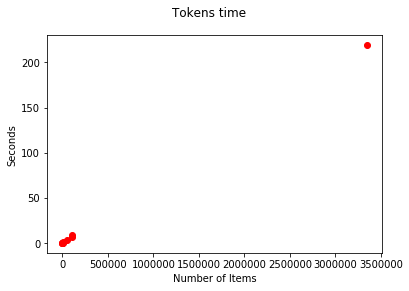

In [26]:
plt.plot([1, 10, 100, 1000, 10000, 50000, 100000, 107401, 3346025], [0.000996, 0.001990795, 0.0085, 0.074908018, 0.687192678, 3.57846379, 6.846399, 8.319787, 219], 'ro')
plt.ylabel('Seconds')
plt.xlabel('Number of Items')
plt.suptitle('Tokens time')
plt.show()

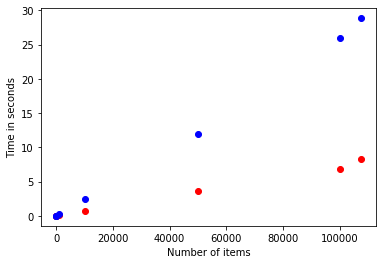

In [2]:
plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.000996828, 0.001990795, 0.074908018, 0.687192678, 3.57846379, 6.846399, 8.319787], 'ro')
plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.00396828, 0.00698828697, 0.2562823, 2.45248556, 11.957, 26.0, 28.867], 'bo')
#plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.000996, 0.001990795, 0.074908018, 0.687192678, 3.57846379, 6.846399, 8.319787], 'go')
plt.ylabel('Time in seconds')
plt.xlabel('Number of items')
#plt.suptitle('Reds are tokens and blues are lemmas')
plt.savefig('Time_to_calculate_tokens_and_lemmas.png')
plt.show()

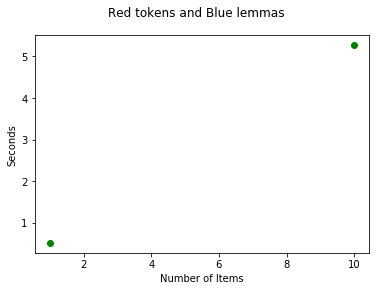

In [48]:
#plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.000996828, 0.001990795, 0.074908018, 0.687192678, 3.57846379, 6.846399, 8.319787], 'ro')
#plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.00396828, 0.00698828697, 0.2562823, 2.45248556, 11.957, 26.0, 28.867], 'bo')
plt.plot([1, 10], [0.51562, 5.26698], 'go')
plt.ylabel('Seconds')
plt.xlabel('Number of Items')
plt.suptitle('Red tokens and Blue lemmas')
plt.show()

In [6]:
def readCSV(item):
    data = pd.read_csv(item, dtype={0: str}, index_col=0, encoding='latin-1')
    df = pd.DataFrame(data)
    return df

In [7]:
reviews = readCSV('yelp_review.csv')

In [8]:
reviews

,user_id,business_id,stars,date,text,useful,funny,cool
review_id,,,,,,,,
vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
...,...,...,...,...,...,...,...,...
PoGSiNz1X5SUu0qEt-qM5w,mPjPyipaD0C_myqWqDipZg,Ngk84Ax1tXgpoJFEGxot3w,1,2011-11-21,"Bought groupon $39 for 4 months from groupon, ...",36,3,3
-CJNPrDWgIkorx4iEZJXIg,mPjPyipaD0C_myqWqDipZg,pOEL97ld-FJMKO8Ki8JmYg,3,2016-04-30,"Spring rolls was pretty good, cod was a bit ra...",0,0,0
W9eVvOcpBvG6lpJPoJOxuA,mPjPyipaD0C_myqWqDipZg,5ubokMNw8qfbX2WtxgJG1Q,4,2011-10-23,"Had a 8 dish set meal, was enough for 10 peopl...",3,0,1


WilcoxonResult(statistic=8.5, pvalue=0.17856536396442713)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


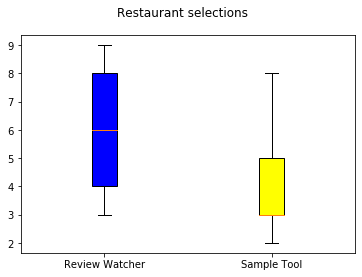

In [4]:
value1 = [4,4,6,3,7,9,5,9,8]
value2 = [3,8,7,4,3,3,5,3,2]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Restaurant selections', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Restaurant_selections.png')
plt.show()

WilcoxonResult(statistic=3.0, pvalue=0.03569190011680441)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


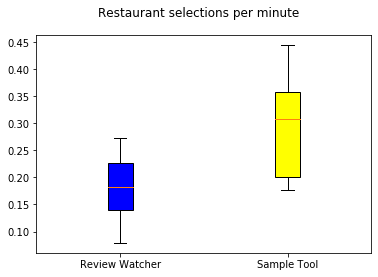

In [21]:
value1 = [4,4,6,3,7,9,5,9,8]
value2 = [3,8,7,4,3,3,5,3,2]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Restaurant selections per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Restaurant_selectionsPM.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.007264382942252025)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


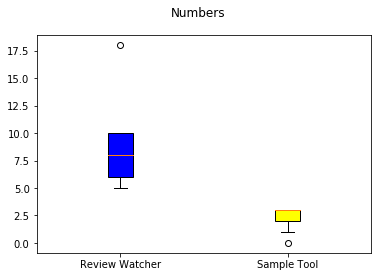

In [23]:
value1 = [6,7,5,10,10,9,8,6,18]
value2 = [2,3,1,3,3,2,3,0,3]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Numbers', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Numbers.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.007685794055213263)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


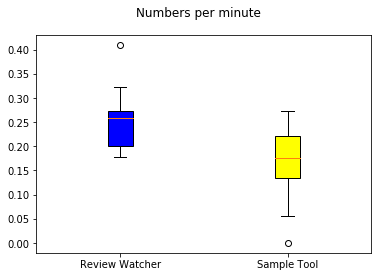

In [34]:
value1 = [6,7,5,10,10,9,8,6,18]
value2 = [2,3,1,3,3,2,3,0,3]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Numbers per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('NumbersPM.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.03843393023678171)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


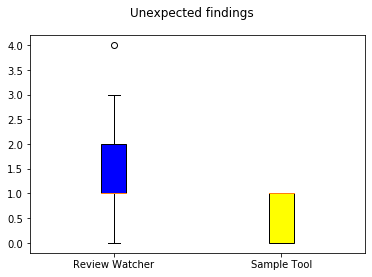

In [6]:
value1 = [2,4,2,3,0,0,1,1,1]
value2 = [1,1,1,0,0,0,1,1,0]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Unexpected findings', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Unexpected_Findings.png')
plt.show()

WilcoxonResult(statistic=7.0, pvalue=0.463071015014588)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


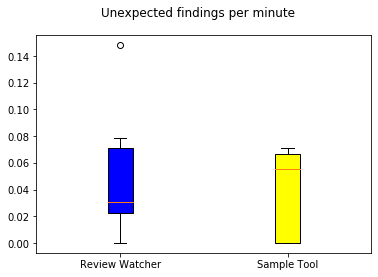

In [26]:
value1 = [2,4,2,3,0,0,1,1,1]
value2 = [1,1,1,0,0,0,1,1,0]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Unexpected findings per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Unexpected_FindingsPM.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.0157641152996124)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


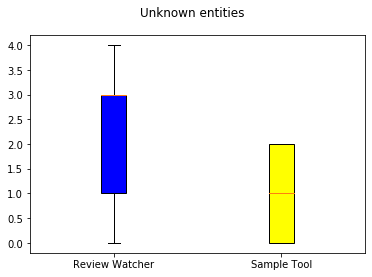

In [7]:
value1 = [3,4,1,1,3,0,2,3,3]
value2 = [0,2,1,0,2,0,1,2,1]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Unknown entities', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Unknown_Entities.png')
plt.show()

WilcoxonResult(statistic=17.0, pvalue=0.8886378608950078)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


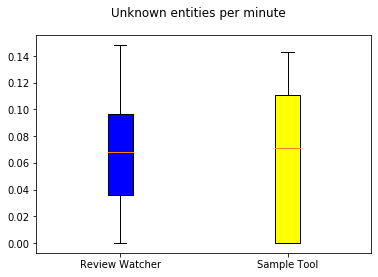

In [27]:
value1 = [3,4,1,1,3,0,2,3,3]
value2 = [0,2,1,0,2,0,1,2,1]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]

print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Unknown entities per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Unknown_EntitiesPM.png')
plt.show()

WilcoxonResult(statistic=3.0, pvalue=0.035240223824274504)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


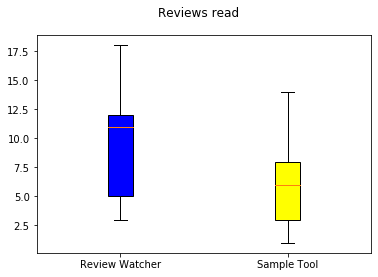

In [8]:
value1 = [18,5,15,5,3,12,11,8,12]
value2 = [8,7,14,1,2,3,5,8,6]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Reviews read', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Reviews_Read.png')
plt.show()

WilcoxonResult(statistic=11.0, pvalue=0.1730709208049953)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


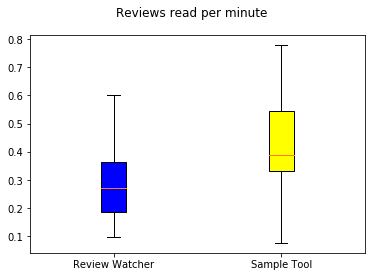

In [28]:
value1 = [18,5,15,5,3,12,11,8,12]
value2 = [8,7,14,1,2,3,5,8,6]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Reviews read per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Reviews_ReadPM.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.0075792819433897285)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


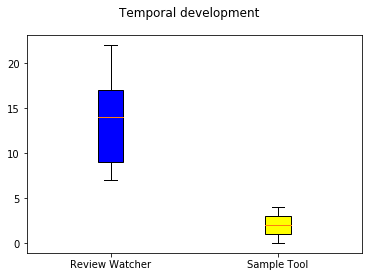

In [30]:
value1 = [11,9,7,18,9,15,17,14,22]
value2 = [2,0,3,4,1,2,4,2,0]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Temporal development', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Temporal_Development.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.007685794055213263)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


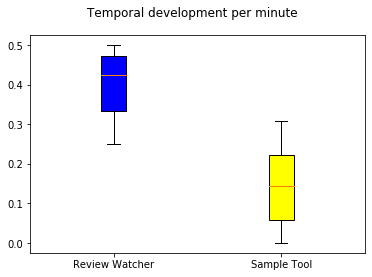

In [29]:
value1 = [11,9,7,18,9,15,17,14,22]
value2 = [2,0,3,4,1,2,4,2,0]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Temporal development per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Temporal_DevelopmentPM.png')
plt.show()

WilcoxonResult(statistic=2.0, pvalue=0.04105088656045887)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


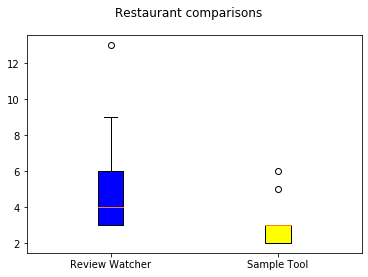

In [10]:
value1 = [3,4,4,13,3,4,3,9,6]
value2 = [3,5,3,6,3,2,2,3,2]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Restaurant comparisons', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Restaurant_Comparisons.png')
plt.show()

WilcoxonResult(statistic=3.0, pvalue=0.020879263166351643)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


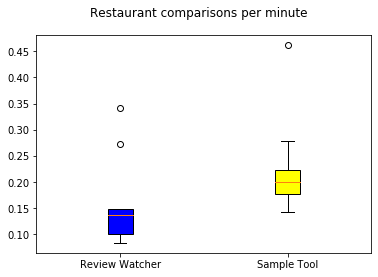

In [31]:
value1 = [3,4,4,13,3,4,3,9,6]
value2 = [3,5,3,6,3,2,2,3,2]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Restaurant comparisons per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Restaurant_ComparisonsPM.png')
plt.show()

WilcoxonResult(statistic=1.0, pvalue=0.010792782163388177)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


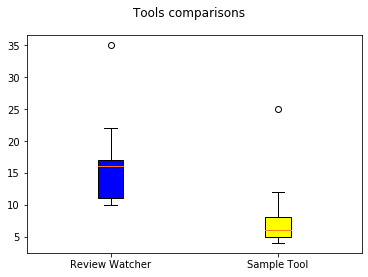

In [11]:
value1 = [11,16,17,13,35,10,22,11,16]
value2 = [12,7,5,6,25,8,5,4,5]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Tools comparisons', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Tools_Comparisons.png')
plt.show()

WilcoxonResult(statistic=16.0, pvalue=0.44126813332892967)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


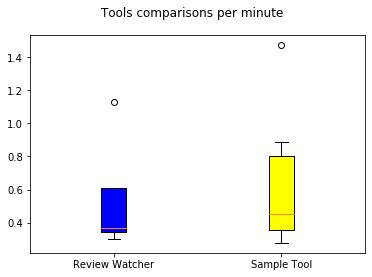

In [32]:
value1 = [11,16,17,13,35,10,22,11,16]
value2 = [12,7,5,6,25,8,5,4,5]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Tools comparisons per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Tools_ComparisonsPM.png')
plt.show()

WilcoxonResult(statistic=2.5, pvalue=0.01771716531701047)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


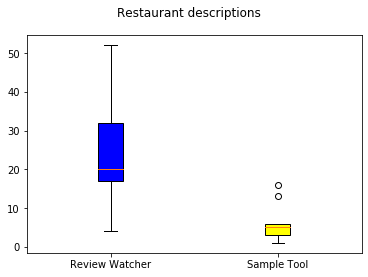

In [12]:
value1 = [14,4,19,43,20,22,32,17,52]
value2 = [5,13,16,3,1,4,5,6,2]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Restaurant descriptions', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Restaurant_Descriptions.png')
plt.show()

WilcoxonResult(statistic=9.0, pvalue=0.10974463874701328)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


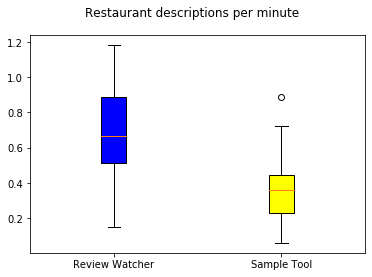

In [33]:
value1 = [14,4,19,43,20,22,32,17,52]
value2 = [5,13,16,3,1,4,5,6,2]
value1 = [a/b for a,b in zip(value1,[30,27,28,38,31,33,36,33,44])]
value2 = [a/b for a,b in zip(value2,[15,18,18,13,17,9,14,14,11])]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Restaurant descriptions per minute', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Restaurant_DescriptionsPM.png')
plt.show()

WilcoxonResult(statistic=0.0, pvalue=0.007685794055213263)


C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


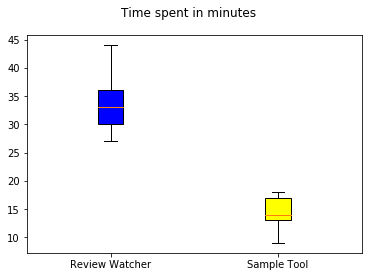

In [13]:
value1 = [30,27,28,38,31,33,36,33,44]
value2 = [15,18,18,13,17,9,14,14,11]
 
print(stats.wilcoxon(value1, value2))
 
# figure related code
fig = plt.figure()
fig.suptitle('Time spent in minutes', fontsize=12)
    
box_plot_data=[value1,value2]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['Review Watcher','Sample Tool'])

colors = ['blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

plt.savefig('Time_Spent_in_Minutes.png')
plt.show()

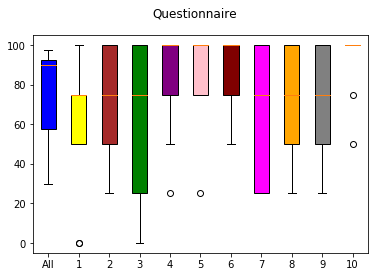

In [34]:
value0 = [0,0,0,0,0,0,0,0,0]
value1 = [3,4,0,0,3,3,3,2,3]
value2 = [3,4,2,1,3,4,1,4,4]
value3 = [4,4,1,1,3,4,0,3,3]
value4 = [4,4,3,2,1,4,4,4,4]
value5 = [3,4,4,1,4,4,4,4,3]
value6 = [4,4,2,2,4,4,3,3,4]
value7 = [4,4,1,1,3,3,1,4,4]
value8 = [4,3,2,1,3,4,1,4,4]
value9 = [3,4,1,1,2,4,2,4,4]
value10 = [4,4,3,2,4,4,4,4,4]


df = pd.DataFrame(data=[value1, value2, value3, value4, value5, value6, value7, value8, value9, value10])
df = df*2.5

for i in range(len(value0)):
    value0[i] = float(df.iloc[:,[i]].sum())
    
value1 = [i * 25 for i in value1]
value2 = [i * 25 for i in value2]
value3 = [i * 25 for i in value3]
value4 = [i * 25 for i in value4]
value5 = [i * 25 for i in value5]
value6 = [i * 25 for i in value6]
value7 = [i * 25 for i in value7]
value8 = [i * 25 for i in value8]
value9 = [i * 25 for i in value9]
value10 = [i * 25 for i in value10]

# figure related code
fig = plt.figure()
fig.suptitle('Questionnaire', fontsize=12)
    
box_plot_data=[value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10]
box = plt.boxplot(box_plot_data,patch_artist=True,labels=['All','1','2','3','4','5','6','7','8','9','10'])

colors = ['blue', 'yellow', 'brown', 'green', 'purple', 'pink', 'maroon', 'magenta', 'orange', 'grey']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)    

#plt.savefig('Questionnaire.png')
plt.show()

In [6]:
import statistics 
statistics.median([3,4,1,1,2,4,2,4,4])*25

75

In [48]:
sum1 = sum(value0)/9
print(sum1)

sum1 = sum(value1)/9
print(sum1)

sum1 = sum(value2)/9
print(sum1)

sum1 = sum(value3)/9
print(sum1)

sum1 = sum(value4)/9
print(sum1)

sum1 = sum(value5)/9
print(sum1)

sum1 = sum(value6)/9
print(sum1)

sum1 = sum(value7)/9
print(sum1)

sum1 = sum(value8)/9
print(sum1)

sum1 = sum(value9)/9
print(sum1)

sum1 = sum(value10)/9
print(sum1)

75.0
58.333333333333336
72.22222222222223
63.888888888888886
83.33333333333333
86.11111111111111
83.33333333333333
69.44444444444444
72.22222222222223
69.44444444444444
91.66666666666667


In [6]:
t0 = time.time()
client = MongoClient()
db = client.test_database
collection = db.test_collection

reviews_plainMongo = db.reviews_plain
reviewsPlain = pd.DataFrame(list(reviews_plainMongo.find({})))
del reviewsPlain["_id"]
reviewsPlain = reviewsPlain.astype({'stars': np.int8})
t1 = time.time()
print("Just reviews in nimutes: " + str((t1-t0)/60))

Just reviews in: 0.6298242131868999


In [29]:
reviewsPlain

,stars,date,text,new_name
0,5,2017-08-02,Dont miss the peppercorn steak . The peppercor...,"""Mon Ami Gabi"" - 89109"
1,3,2013-03-16,This is a great place to come during the summe...,"""Mon Ami Gabi"" - 89109"
2,4,2013-01-04,Mon Ami Gabi is practically a landmark. In fac...,"""Mon Ami Gabi"" - 89109"
3,4,2010-07-02,Having done Vegas (at least once) every year f...,"""Mon Ami Gabi"" - 89109"
4,5,2017-08-04,"To start with, I'm French and I'm a Vegas loca...","""Mon Ami Gabi"" - 89109"
...,...,...,...,...
3346019,1,2017-08-18,Bar is absolute trash. Came in spend over 150 ...,"""Timbers Rancho"" - 89130"
3346020,4,2017-10-13,Nice place! I am a non-smoker and although a f...,"""Timbers Rancho"" - 89130"
3346021,5,2009-05-22,Are you kidding me?? 1 star? \r\r\r\n\r\r\r\nO...,"""Budweiser Racing Track Bar & Grill"" - 89119"
3346022,2,2013-05-14,$14.35 for a beer and a coke. \r\r\r\n\r\r\r\n...,"""Budweiser Racing Track Bar & Grill"" - 89119"


In [54]:
%timeit -n 10 -r 5 fil2.main(reviewsPlain, "", '"Mon Ami Gabi" - 89109', '1', '2016-01-01', '2016-01-01')

180 ms ± 3.73 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [55]:
%timeit -n 10 -r 5 fil2.main(reviewsPlain, "", '"Mon Ami Gabi" - 89109', '1', '', '')

183 ms ± 2.97 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [56]:
%timeit -n 10 -r 5 fil2.main(reviewsPlain, "", '"Mon Ami Gabi" - 89109', '', '', '')

185 ms ± 6.21 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [57]:
%timeit -n 10 -r 5 list(reviews_plainMongo.find({"stars": 1 , "new_name":'"Mon Ami Gabi" - 89109', "date":"2016-01-01"}))

1.73 s ± 44.9 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [58]:
%timeit -n 10 -r 5 list(reviews_plainMongo.find({"stars": 1 , "new_name":'"Mon Ami Gabi" - 89109'}))

1.81 s ± 26.3 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [59]:
%timeit -n 10 -r 5 list(reviews_plainMongo.find({"new_name":'"Mon Ami Gabi" - 89109'}))

1.84 s ± 24.3 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


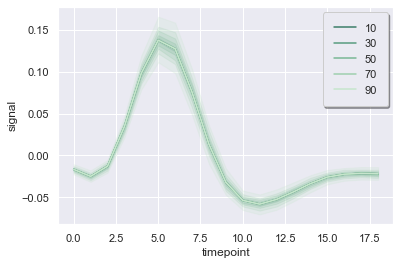

In [41]:
import seaborn as sns; sns.set()
fmri = sns.load_dataset("fmri")

confidenceIntervals = [10, 30, 50, 70, 90]

colorPalette = sns.color_palette("ch:2.5,-.2,dark=.4", n_colors=len(confidenceIntervals))[::-1]

for jj, ii in enumerate(confidenceIntervals):
    ax = sns.lineplot(x="timepoint", y="signal", data=fmri, ci=ii, label=str(ii), 
                      color=colorPalette[jj])

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.savefig('Confidence.png')

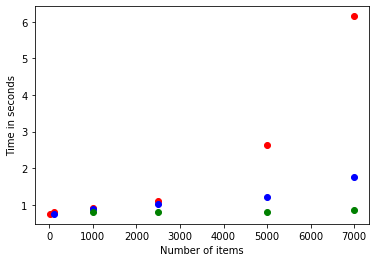

In [8]:
plt.plot([10, 100, 1000, 2500, 5000, 7000], [0.75, 0.79, 0.9, 1.1, 2.62, 6.15], 'ro')
plt.plot([100, 1000, 2500, 5000, 7000], [0.76, 0.88, 1.01, 1.22, 1.76], 'bo')
plt.plot([1000, 2500, 5000, 7000], [0.80, 0.80, 0.81, 0.86], 'go')
#plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.000996, 0.001990795, 0.074908018, 0.687192678, 3.57846379, 6.846399, 8.319787], 'go')
plt.ylabel('Time in seconds')
plt.xlabel('Number of items')
#plt.suptitle('Reds are tokens and blues are lemmas')
plt.savefig('Time_to_calculate_TF_IDF.png')
plt.show()

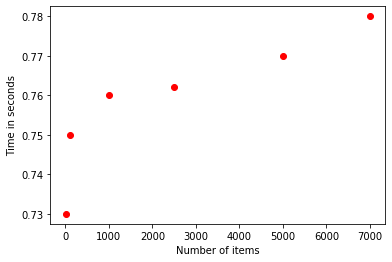

In [11]:
plt.plot([10, 100, 1000, 2500, 5000, 7000], [0.73, 0.75, 0.76, 0.762, 0.77, 0.78], 'ro')
#plt.plot([100, 1000, 2500, 5000, 7000], [0.76, 0.88, 1.01, 1.22, 1.76], 'bo')
#plt.plot([1000, 2500, 5000, 7000], [0.80, 0.80, 0.81, 0.86], 'go')
#plt.plot([1, 10, 1000, 10000, 50000, 100000, 107401], [0.000996, 0.001990795, 0.074908018, 0.687192678, 3.57846379, 6.846399, 8.319787], 'go')
plt.ylabel('Time in seconds')
plt.xlabel('Number of items')
#plt.suptitle('Reds are tokens and blues are lemmas')
plt.savefig('Time_to_calculate_top_words.png')
plt.show()